In [32]:
import pandas as pd
employee_data = pd.read_csv("Documents/Caltech AI ML/Machine Learning Project/Project 1/1717428188_hr_comma_sep/HR_comma_sep.csv")
employee_data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [34]:
#Step-1: Perform data quality checks by checking for missing values, if any.
employee_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

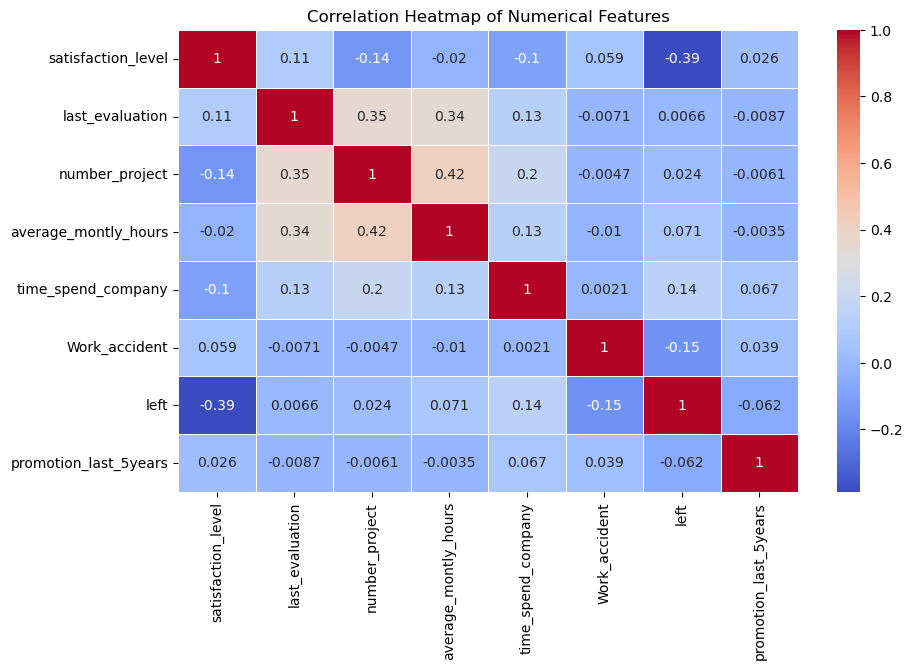

In [36]:
#Step-2:
#2.1. Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
import matplotlib.pyplot as plt
import seaborn as sns
# Compute Correlation Matrix
corr_matrix = employee_data.corr(numeric_only=True)
# Set the size of the plot
plt.figure(figsize=(10,6))
# Draw heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

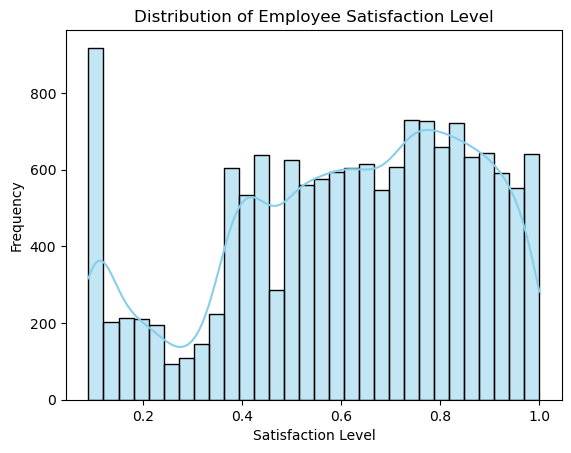

In [38]:
#Step-2:
#2.2. Draw the distribution plot of:
# ■	Employee Satisfaction (use column satisfaction_level)
sns.histplot(employee_data['satisfaction_level'], kde=True, color='skyblue')
plt.title('Distribution of Employee Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()


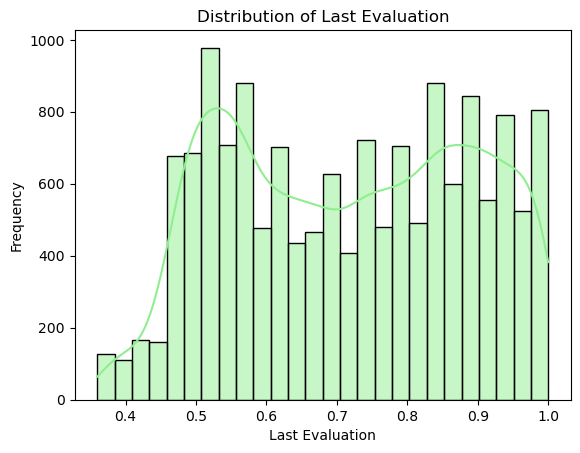

In [40]:
#Step-2:
#2.2. Draw the distribution plot of:
# ■	Employee Evaluation (use column last_evaluation)
sns.histplot(employee_data['last_evaluation'], kde=True, color='lightgreen')
plt.title('Distribution of Last Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')
plt.show()

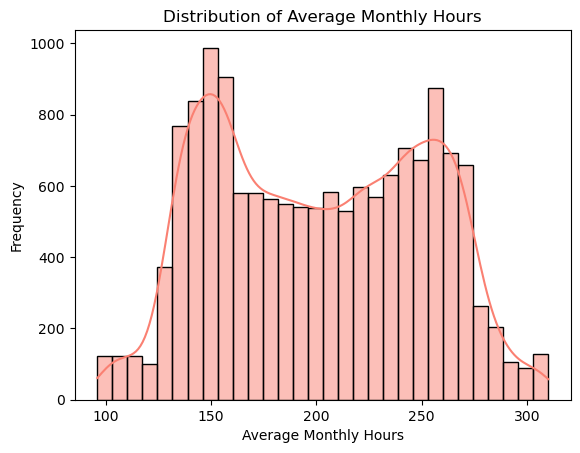

In [42]:
#Step-2:
#2.2. Draw the distribution plot of:
# ■	Employee Average Monthly Hours (use column average_montly_hours)
sns.histplot(employee_data['average_montly_hours'], kde=True, color='salmon')
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()

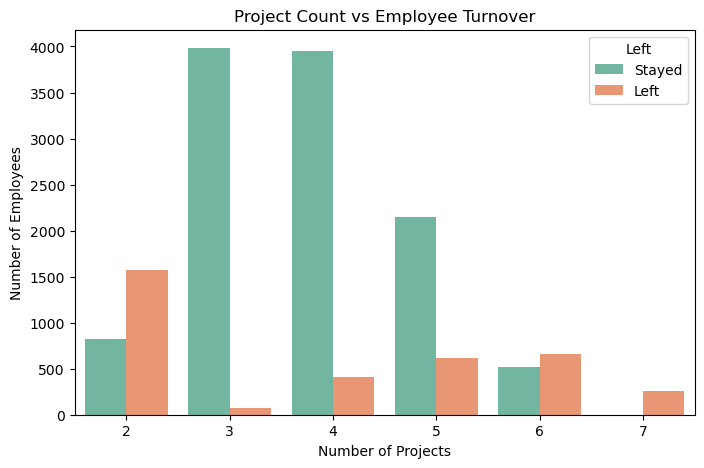

In [44]:
#Step-2:
#2.3. Draw the bar plot of the employee project count of both employees who left and stayed in the organization 
#(use column number_project and hue column left), and give your inferences from the plot.
plt.figure(figsize=(8, 5))
sns.countplot(x='number_project',hue='left', data=employee_data, palette='Set2')
plt.title('Project Count vs Employee Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

**Inferences from the bar plot:**
1. Employees with 2 or 3 projects mostly stayed.
2. A sharp rise in exits is seen among employees with 4 or more projects, especially those with 6 or 7 projects — indicating possible overwork.
3. Very low or very high project loads may lead to turnover, suggesting an optimal range in workload can improve retention.

In [47]:
#Step-3: Perform clustering of employees who left based on their satisfaction and evaluation.
#3.1. Choose columns satisfaction_level, last_evaluation, and left.
employees_left = employee_data[employee_data['left'] == 1][['satisfaction_level', 'last_evaluation']]

In [49]:
employees_left

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [51]:
#Step-3:
#3.2. Do K-means clustering of employees who left the company into 3 clusters.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, random_state=42)
employees_left['cluster'] = kmeans.fit_predict(employees_left)

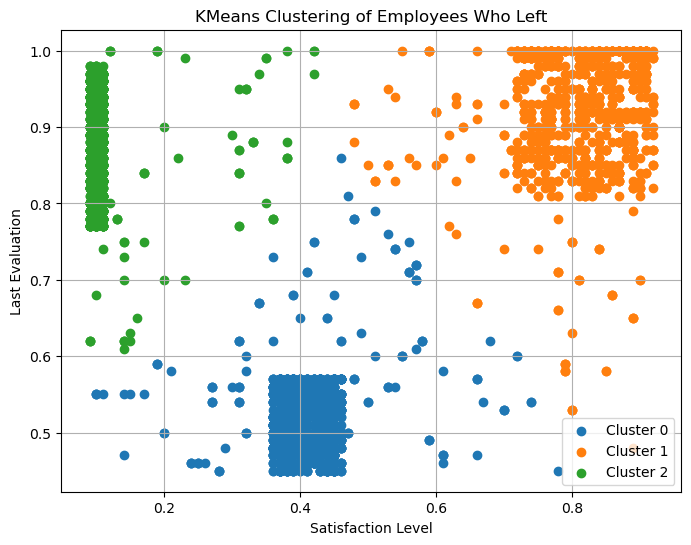

In [53]:
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = employees_left[employees_left['cluster'] == cluster]
    plt.scatter(cluster_data['satisfaction_level'], cluster_data['last_evaluation'], label=f'Cluster {cluster}')
    
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('KMeans Clustering of Employees Who Left')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
#Step-3:
#3.3. Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.
#Interpret the Clusters:
#Once we have the clusters, here's how you might interpret them:

#Cluster	  Satisfaction Level	   Last Evaluation	    Possible Interpretation

#Cluster 0	  Low	                   Low to Medium	    Disengaged Employees – likely felt undervalued and unmotivated.

#Cluster 1	  High	                   High	                Overworked High Performers – performing well but possibly burned out.

#Cluster 2	  Medium	               Medium	            Moderately Satisfied – possibly looking for better opportunities despite being okay at work.

In [57]:
#Step-4. Handle the left Class Imbalance using the SMOTE technique.
#4.1. Pre-process the data by converting categorical columns to numerical columns by:
# ■ Separating categorical variables and numeric variables.
X = employee_data.drop('left', axis=1)
y = employee_data['left']
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['number']).columns
# ■	Applying get_dummies() to the categorical variables.
X_cat_encoded = pd.get_dummies(X[cat_cols], drop_first=True)
X_num = X[num_cols]
# ■	Combining categorical variables and numeric variables.
X_processed = pd.concat([X_num, X_cat_encoded], axis=1)

In [59]:
#4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=123, stratify=y)

In [61]:
#4.3. Upsample the train dataset using the SMOTE technique from the imblearn module.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [63]:
print("Original class distribution:\n", y_train.value_counts())
print("\nResampled class distribution:\n", y_train_resampled.value_counts())

Original class distribution:
 left
0    9142
1    2857
Name: count, dtype: int64

Resampled class distribution:
 left
0    9142
1    9142
Name: count, dtype: int64


In [65]:
#5. Perform 5-fold cross-validation model training and evaluate performance.
#5.1. Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
#5.2. Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
#5.3. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
def evaluate_model_cv(model, X, y, model_name="Model"):
    print(f"Evaluating {model_name} with 5-Fold Cross-Validation...")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=cv)

    # Classification report
    print(f"\nClassification Report for {model_name}:\n")
    report = classification_report(y, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    # Plot classification report as heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
    plt.title(f'{model_name} - Classification Report (5-Fold CV)')
    plt.show()

    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

Evaluating Logistic Regression with 5-Fold Cross-Validation...

Classification Report for Logistic Regression:



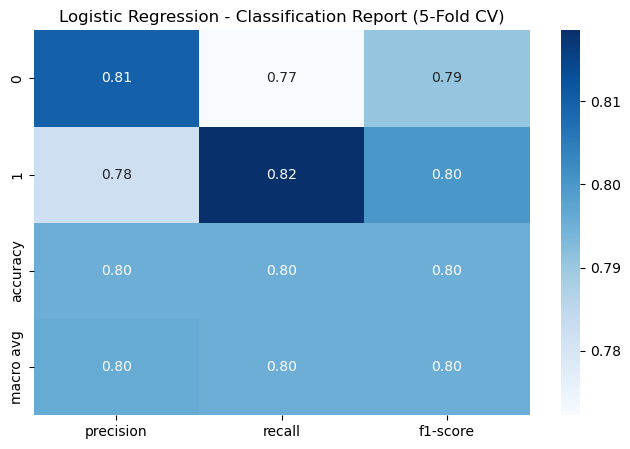

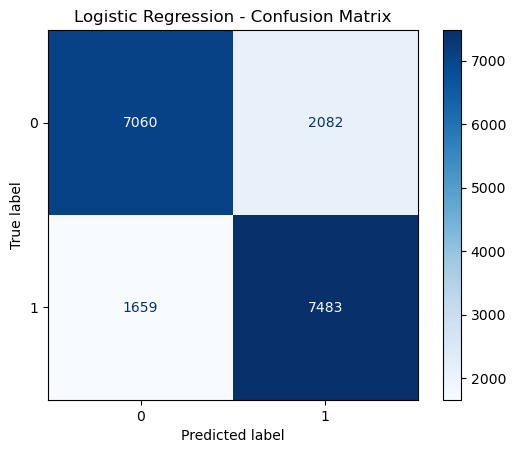

Evaluating Random Forest Classifier with 5-Fold Cross-Validation...

Classification Report for Random Forest Classifier:



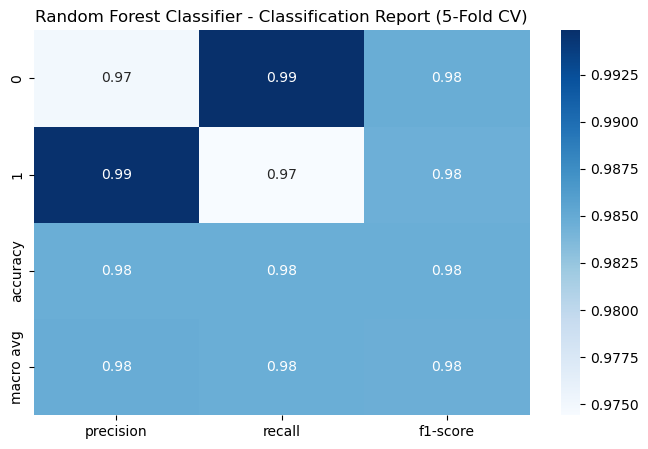

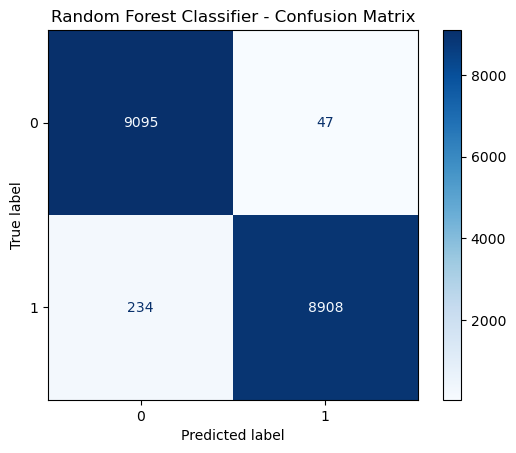

Evaluating Gradient Boosting Classifier with 5-Fold Cross-Validation...

Classification Report for Gradient Boosting Classifier:



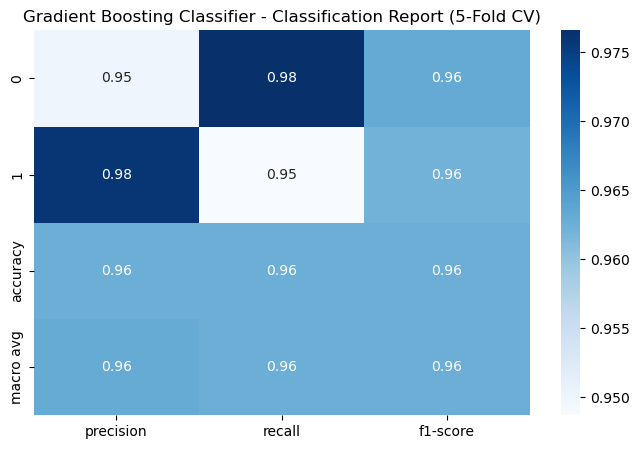

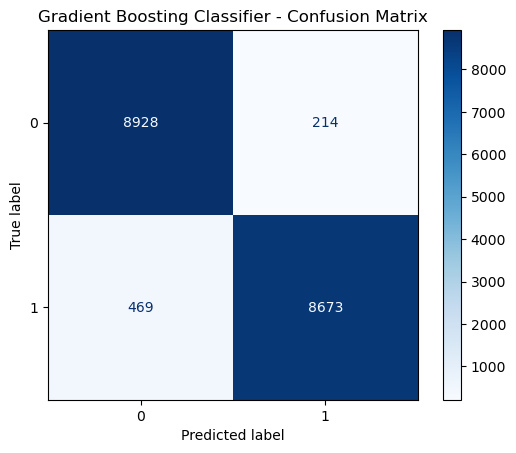

In [71]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
evaluate_model_cv(log_reg, X_train_resampled, y_train_resampled, model_name="Logistic Regression")

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model_cv(rf, X_train_resampled, y_train_resampled, model_name="Random Forest Classifier")

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model_cv(gb, X_train_resampled, y_train_resampled, model_name="Gradient Boosting Classifier")

In [7]:
#6. Identify the best model and justify the evaluation metrics used.
#6.1. Find the ROC/AUC for each model and plot the ROC curve.

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

In [63]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [57]:
def plot_roc_auc_test(models, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves of Models on Test Data')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

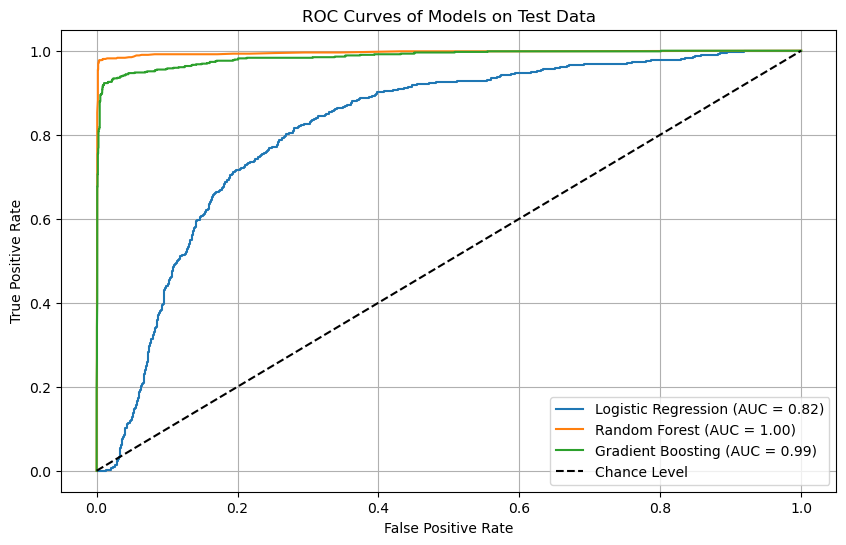

In [59]:
plot_roc_auc_test(models, X_train_resampled, y_train_resampled, X_test, y_test)

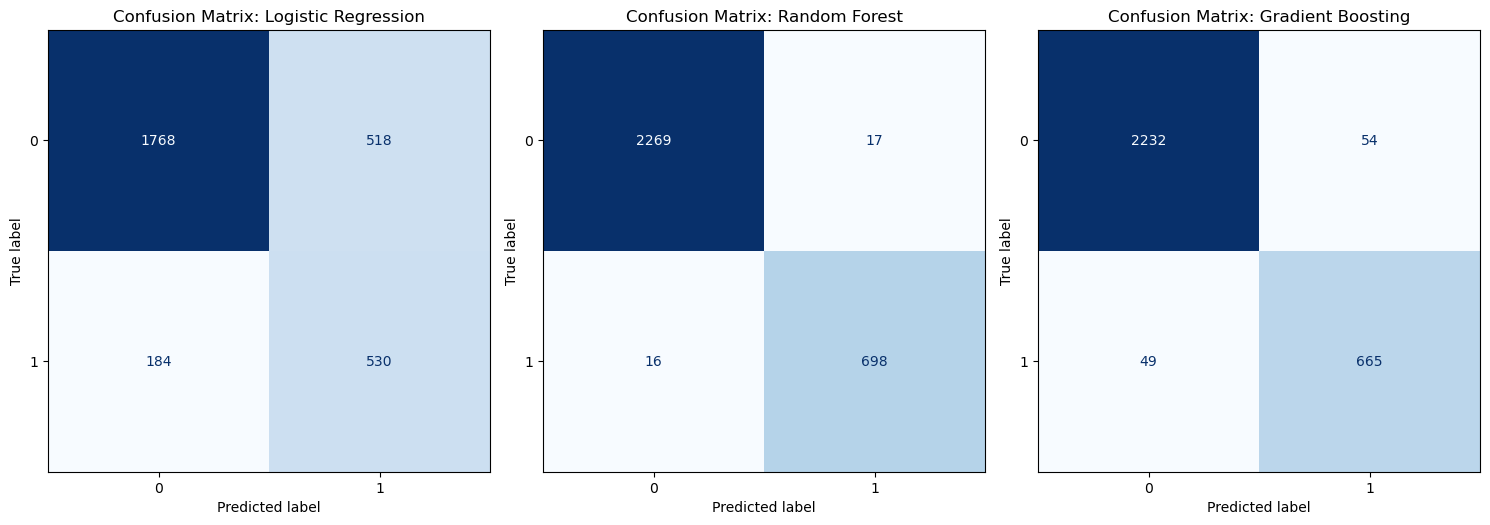

In [65]:
#6.2. Find the confusion matrix for each of the models.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrices(models, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(15, 5))
    
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        
        plt.subplot(1, len(models), i + 1)
        disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)
        plt.title(f'Confusion Matrix: {name}')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(models, X_train_resampled, y_train_resampled, X_test, y_test)

In [9]:
#6.3. Explain which metric needs to be used from the confusion matrix: Recall or Precision?

**6.3 Explanation: Recall vs Precision:**

In the context of predicting employee turnover, **Recall** is the most important metric because it measures the ability of the model to identify all employees who are likely to leave. Missing a true leaver (false negative) means losing an opportunity for early intervention and retention, which can be costly for the company.

**Precision** is also important as it indicates how many of the predicted leavers actually leave, helping avoid unnecessary retention efforts. However, false positives are less costly than false negatives in this scenario, so **Recall takes priority**.


In [83]:
#7.	Suggest various retention strategies for targeted employees.
#7.1. Using the best model, predict the probability of employee turnover in the test data.
from sklearn.ensemble import GradientBoostingClassifier

# Retrain the best model (if not already trained).
best_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities for the positive class (left = 1).
y_proba = best_model.predict_proba(X_test)[:, 1]

# Preview some predicted probabilities.
import pandas as pd
prob_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted_Probability': y_proba
})

prob_df.head()

,Actual,Predicted_Probability
0,0,0.006051
1,0,0.953883
2,0,0.092444
3,0,0.018464
4,0,0.026333


**Predicting Employee Turnover Probability:**

We used the best-performing model (Gradient Boosting) to predict the probability that each employee in the test data is likely to leave the company.
The `predict_proba()` function outputs a probability score between 0 and 1 for each employee. These scores will be used to classify employees into risk categories in the next step.

In [ ]:
#7.2.Based on the probability score range below, categorize the employees into four zones 
#and suggest your thoughts on the retention strategies for each zone.
# ■ Safe Zone (Green) (Score < 20%)
# ■ Low-Risk Zone (Yellow) (20% < Score < 60%)
# ■ Medium-Risk Zone (Orange) (60% < Score < 90%)
# ■ High-Risk Zone (Red) (Score > 90%).

In [100]:
# Categorize each employee based on their predicted probability.
def categorize_risk(score):
    if score < 0.2:
        return 'Safe Zone (Green)'
    elif score < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif score < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# Function to create a new column.
prob_df['Risk_Zone'] = prob_df['Predicted_Probability'].apply(categorize_risk)

# To show distribution of employees in each zone.
risk_distribution = prob_df['Risk_Zone'].value_counts()
display(risk_distribution)

# To show a few examples.
prob_df.head()

Risk_Zone
Safe Zone (Green)            2091
High-Risk Zone (Red)          616
Low-Risk Zone (Yellow)        210
Medium-Risk Zone (Orange)      83
Name: count, dtype: int64

,Actual,Predicted_Probability,Risk_Zone
0,0,0.006051,Safe Zone (Green)
1,0,0.953883,High-Risk Zone (Red)
2,0,0.092444,Safe Zone (Green)
3,0,0.018464,Safe Zone (Green)
4,0,0.026333,Safe Zone (Green)


#### 7.2 Risk-Based Categorization and Retention Strategies:

Based on the predicted probability scores from the best model (Gradient Boosting), we classified employees into four risk zones:

- **Safe Zone (Green) (< 20%)**: Employees very unlikely to leave.
- **Low-Risk Zone (Yellow) (20%–60%)**: Some risk of leaving; may require engagement.
- **Medium-Risk Zone (Orange) (60%–90%)**: High concern; consider retention strategies.
- **High-Risk Zone (Red) (> 90%)**: Critical risk of leaving; immediate action required.

**Suggested Retention Strategies:**

- ✅ **Safe Zone (Green)**:
  - Continue to provide a positive work environment.
  - Offer recognition and small rewards to maintain satisfaction.

- 🟡 **Low-Risk Zone (Yellow)**:
  - Conduct periodic 1-on-1 meetings to ensure engagement.
  - Provide opportunities for upskilling, mentorship, and team-building.

- 🟠 **Medium-Risk Zone (Orange)**:
  - Explore workload balance and performance pressure.
  - Offer flexible work arrangements and recognition for efforts.

- 🔴 **High-Risk Zone (Red)**:
  - Prioritize these employees for immediate intervention.
  - Conduct stay interviews to identify dissatisfaction factors.
  - Offer promotions, role changes, or personalized incentives to retain them.

**--------------------------------------------------------------------END OF PROJECT-----------------------------------------------------------------**